## TESLA STOCK PRICE PREDICTION - LINEAR REGRESSION

## IMPORT LIBRARIES

In [1]:
# Importing essential modules
import numpy as np
import pandas as pd
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib


## READ DATA

In [8]:
df = pd.read_csv("TSLA5.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/4/2019,19.219999,19.296000,18.925333,19.058666,19.058666,82183500
1,3/4/2019,19.154667,19.744667,19.144667,19.454000,19.454000,118791000
2,4/4/2019,17.459333,18.080000,17.372667,17.851999,17.851999,355810500
3,5/4/2019,17.990667,18.406668,17.740667,18.330667,18.330667,195574500
4,8/4/2019,18.512667,18.743999,18.029333,18.213333,18.213333,156156000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,179.584499,183.589042,175.247580,179.511683,179.511683,1.328231e+08
std,103.037587,105.214708,100.554967,102.878247,102.878247,8.477230e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,68.689001,73.306665,68.194836,72.651001,72.651001,8.042828e+07
50%,203.660004,208.220001,198.510002,203.351670,203.351670,1.086204e+08
75%,251.392498,256.570000,246.292503,251.844997,251.844997,1.550344e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [11]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
df = df.drop(['Date'],axis=1)

In [13]:
# Creating a shadow copy
copydf = df.copy()

In [14]:
# Seperating Target variables and features
# Target Variable
y = df["Close"]

# Features
x = df.drop(["Close","Adj Close"],axis=1)

In [15]:
# Spliting the data in 80%, 20% for training and testing
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2)

In [16]:
# Making the model using LinearRegression()
model = LinearRegression()

# Fiting the training data in the model
model.fit(xTrain,yTrain)

LinearRegression()

In [17]:
model.score(xTest,yTest)

0.9994937279969083

In [18]:
# Getting the intercept and Coefficients
print("Intercept: ",model.intercept_)
print("Coefficients: ")
for _ in model.coef_:
    print(_)

Intercept:  -0.028909721474718708
Coefficients: 
-0.6623345262504362
0.8709268890728994
0.7899334695666369
1.035388154541339e-09


In [19]:
# Making predictions using the predict() and xTest data
predictions = model.predict(xTest)

In [31]:
predictions

array([ 17.29344596,  20.79308387, 243.33483491, 361.07543524,
       151.40382506, 143.79057647, 200.12266251,  33.13952203,
       236.67686396,  15.92504587,  53.21066296,  28.59046855,
        58.21595817,  47.99277128, 332.43363932, 170.69132018,
       198.19456972, 246.2169504 , 265.99032485, 239.37629952,
       269.70756879,  18.43782013,  21.4436047 , 285.02119978,
       244.7487967 , 170.11329083,  15.37846707,  15.99703604,
       209.04241136,  23.3926629 , 260.94684924, 207.46706732,
       194.94242646, 220.85581897,  23.32988582, 349.38139819,
       184.85562755, 246.26207597, 282.4509081 , 251.06611097,
        30.16588289, 306.3636492 , 239.18645756, 201.67317184,
        35.76315126, 234.954447  , 246.22944602, 272.25679507,
        19.72646241, 234.80606929, 245.90116457,  18.30255463,
       179.33757137, 341.28404886, 380.86606566,  15.18052182,
       177.37817802, 206.85676108, 305.83403016, 225.22136891,
       235.75682292,  98.53189386, 184.24655452, 180.50

In [23]:
comparison = pd.DataFrame({'Predicted Values':predictions,'Actual Values':yTest})

In [24]:
comparison

,Predicted Values,Actual Values
22,17.293446,17.002001
149,20.793084,20.887333
1173,243.334835,246.720001
753,361.075435,363.946655
367,151.403825,149.919998
...,...,...
786,255.770540,256.529999
156,23.228823,23.328667
879,282.663099,282.940002
211,52.068601,52.000000


In [21]:
print(comparison.head(15))

      Predicted Values  Actual Values
22           17.293446      17.002001
149          20.793084      20.887333
1173        243.334835     246.720001
753         361.075435     363.946655
367         151.403825     149.919998
378         143.790576     143.003326
1154        200.122663     200.839996
194          33.139522      32.809334
1171        236.676864     235.449997
68           15.925046      15.928000
271          53.210663      53.367332
190          28.590469      28.684000
223          58.215958      59.960667
266          47.992771      48.807335
680         332.433639     339.010010


## Visualizing the data to inspect the relationship between the target and features and showing the best fit line using seaborn.regplot()

<Axes: xlabel='Volume', ylabel='Close'>

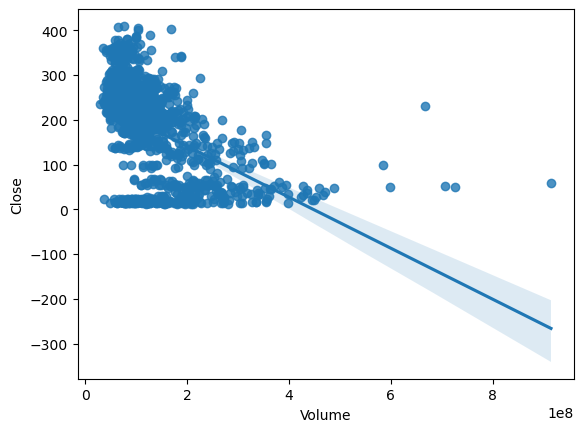

In [26]:
# Closing price vs the Volume
seaborn.regplot(data=copydf, x='Volume', y='Close')

<Axes: xlabel='Close', ylabel='Open'>

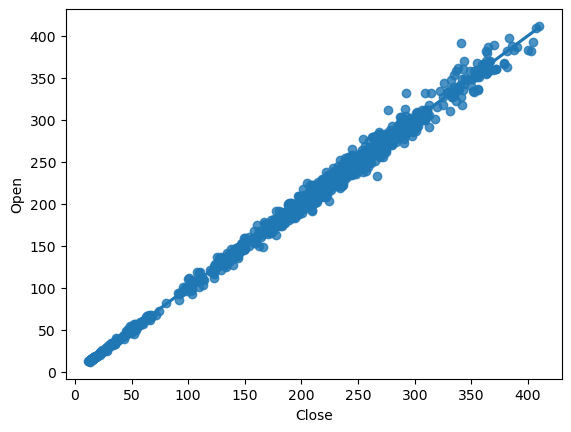

In [27]:
# Closing price vs Opening price
seaborn.regplot(data=copydf, x='Close', y='Open')

<Axes: xlabel='Close', ylabel='High'>

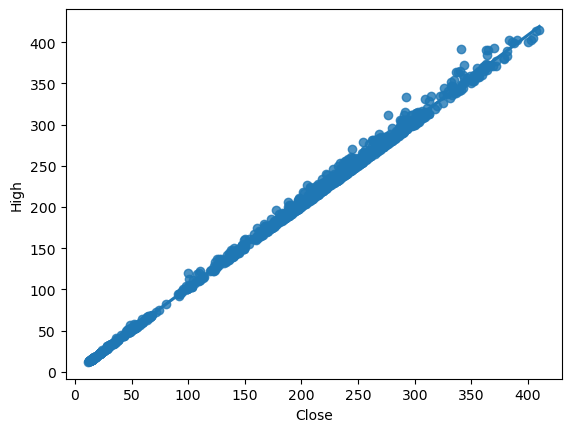

In [28]:
# Closing price vs High price
seaborn.regplot(data=copydf, x="Close", y='High')

<Axes: xlabel='Close', ylabel='Low'>

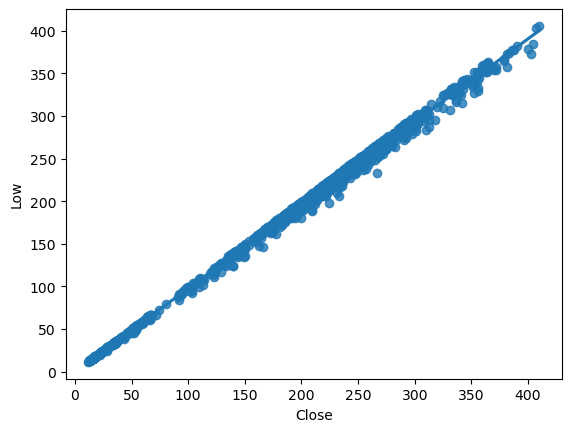

In [29]:
# Closing price vs Low price
seaborn.regplot(data=copydf, x='Close', y="Low")